In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [3]:
data = pd.read_csv('distance2F.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario
0,407472,1,1,1,1,48.59900,0.000213,1.456490,55.0012,865057336,...,566137,1101413,1.00493,1.00493,121.000,121.000,120.3500,824575.0,ns3::ThompsonSamplingWifiManager,A
1,407472,2,1,1,1,48.29050,0.000210,1.453510,55.3470,870249480,...,569535,1101413,1.03520,1.03520,120.996,120.996,119.8320,827826.0,ns3::ThompsonSamplingWifiManager,A
2,407472,1,1,3,1,48.59900,0.000213,1.456490,55.0012,865057336,...,566137,1101413,1.00493,1.00493,121.000,121.000,120.3500,824575.0,ns3::ThompsonSamplingWifiManager,A
3,407472,2,1,3,1,48.29070,0.000210,1.453520,55.3468,870246424,...,569533,1101413,1.03520,1.03520,120.996,120.996,119.8400,827825.0,ns3::ThompsonSamplingWifiManager,A
4,407472,1,1,1,2,4.81836,0.000022,0.153676,101.8510,1601868104,...,1048343,1101413,1.00803,1.00803,121.000,121.000,22.9148,161106.0,ns3::ThompsonSamplingWifiManager,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,407477,2,1,27,3,26.74950,0.000162,1.184380,78.3915,1232776648,...,806791,1101413,1.01931,1.01931,120.998,120.998,130.7530,955547.0,ns3::ThompsonSamplingWifiManager,E
328,407477,1,1,29,3,56.50280,0.000404,1.621050,46.5662,732040352,...,479084,1101413,1.04024,1.04024,120.977,120.977,193.7320,776621.0,ns3::ThompsonSamplingWifiManager,E
329,407477,2,1,29,3,33.98690,0.000195,1.280980,70.6452,1110973656,...,727077,1101413,1.01931,1.01931,121.000,121.000,141.5250,931372.0,ns3::ThompsonSamplingWifiManager,E
330,407477,1,1,31,3,61.76050,0.000389,1.798200,40.9415,643555400,...,421175,1101413,1.07407,1.07407,121.000,121.000,163.6820,757357.0,ns3::ThompsonSamplingWifiManager,E


C:\Users\Admin\AppData\Local\Temp\ipykernel_71008\3365467636.py:12: UserWarning: Mismatched number of handles and labels: len(handles) = 7 len(labels) = 4
  ax.legend(


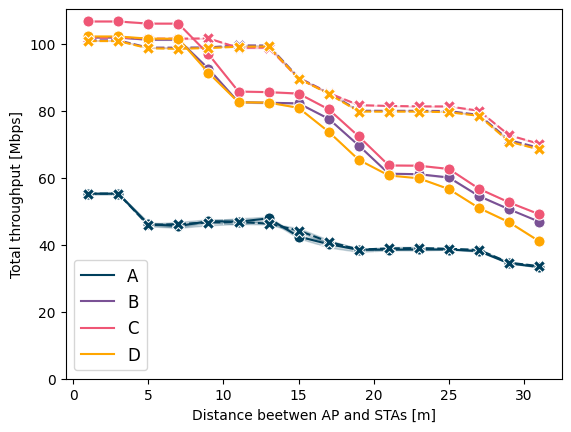

In [4]:
plot_sum = data.groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dist_thr.svg', bbox_inches='tight')

In [23]:
df0 = (
    data.query("flow == 1")                       # zostawiamy tylko flow 0
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)   # zachowaj kolumnę flow
)

#  Flow 1
df1 = (
    data.query("flow == 2")
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)
)

#  Suma flow 0 + 1
df_sum = (
    data
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun'], as_index=False)
        .sum(numeric_only=True)
        .assign(flow='1+2')                       # sztuczna etykieta – tylko żeby było wiadomo
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3365254959.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3365254959.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3365254959.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


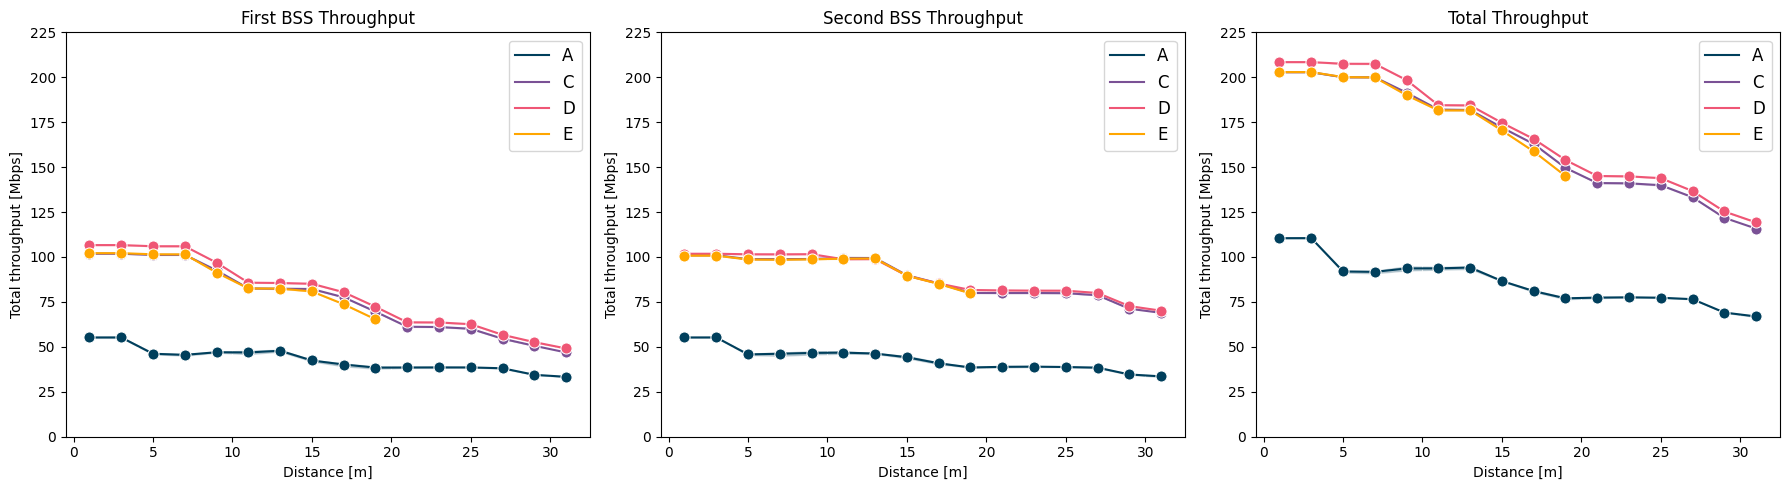

In [24]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'First BSS Throughput'),
    (df1, 'Second BSS Throughput'),
    (df_sum, 'Total Throughput')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='throughput', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[1:7],  # Przytnij, jeśli trzeba
        labels=['A', 'C', 'D', 'E'],  # Twoje etykiety
        ncol=1,
        fontsize='large'
    )

    axes[i].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
    axes[i].set_title(title, fontsize='large')
    if i != 2:
        axes[i].set_ylim(0, 225)
    else:
        axes[i].set_ylim(0, 225) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_thr_flows.svg', bbox_inches='tight')
plt.show()

In [25]:
df0 = (
    data.query("flow == 1")                       # zostawiamy tylko flow 0
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)   # zachowaj kolumnę flow
)

#  Flow 1
df1 = (
    data.query("flow == 2")
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)
)

#  Suma flow 0 + 1
df_sum = (
    data
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun'], as_index=False)
        .mean(numeric_only=True)
        .assign(flow='1+2')                       # sztuczna etykieta – tylko żeby było wiadomo
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3015287448.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3015287448.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\3015287448.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


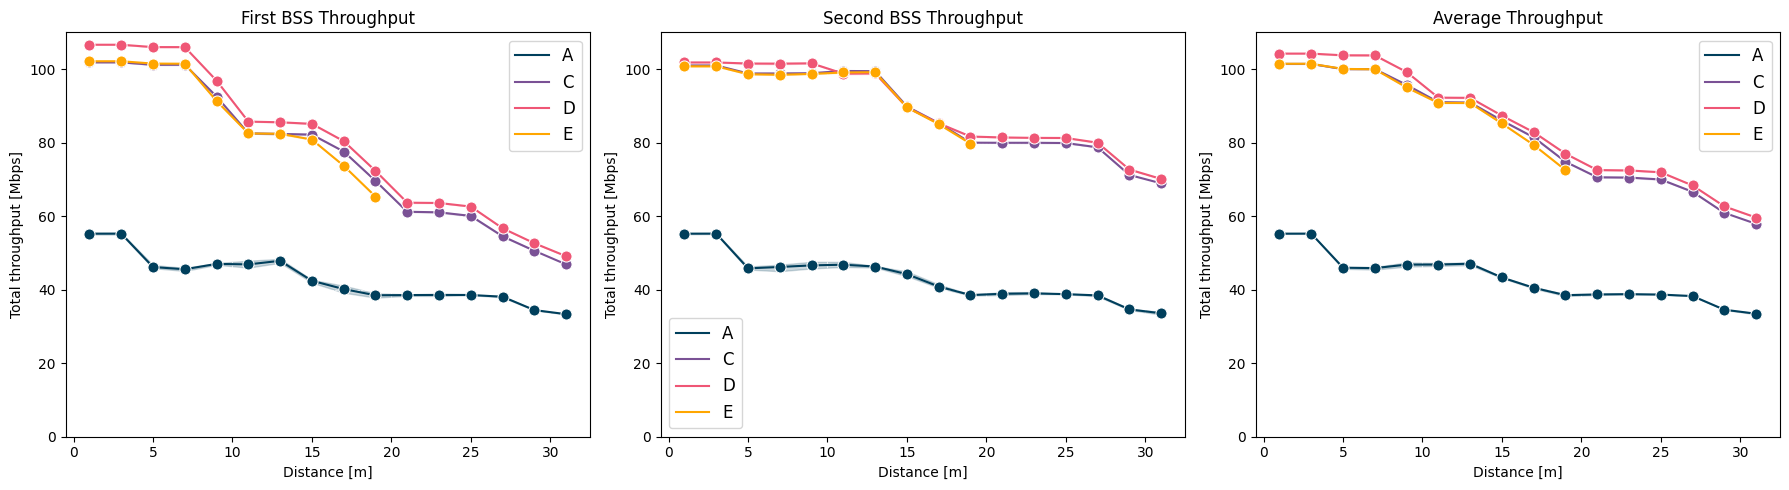

In [26]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'First BSS Throughput'),
    (df1, 'Second BSS Throughput'),
    (df_sum, 'Average Throughput')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='throughput', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[1:7],  # Przytnij, jeśli trzeba
        labels=['A', 'C', 'D', 'E'],  # Twoje etykiety
        ncol=1,
        fontsize='large'
    )

    axes[i].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
    axes[i].set_title(title, fontsize='large')
    if i != 2:
        axes[i].set_ylim(0, 110)
    else:
        axes[i].set_ylim(0, 110) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_thr_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\2444023311.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\2444023311.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\2444023311.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


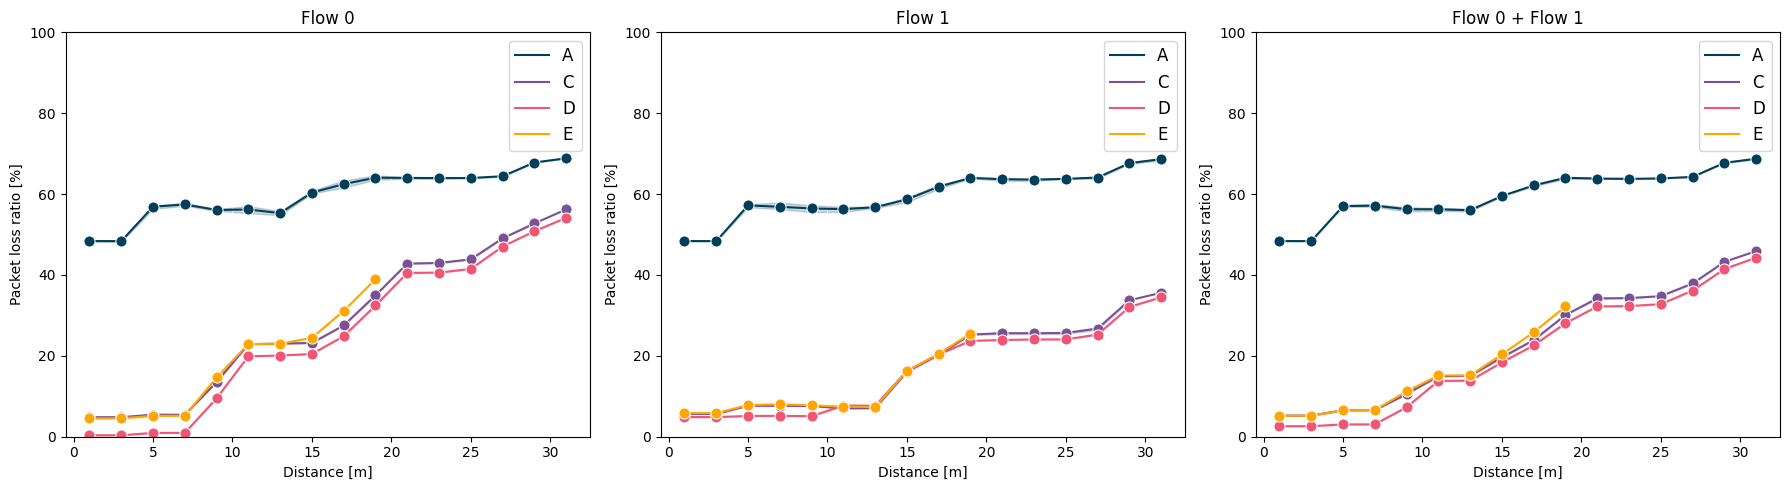

In [27]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Flow 0'),
    (df1, 'Flow 1'),
    (df_sum, 'Flow 0 + Flow 1')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='loss', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[1:7],  # Przytnij, jeśli trzeba
        labels=['A', 'C', 'D', 'E'],  # Twoje etykiety
        ncol=1,
        fontsize='large'
    )

    axes[i].set(xlabel=xlabel, ylabel='Packet loss ratio [%]')
    axes[i].set_title(title, fontsize='large')
    axes[i].set_ylim(0, 100) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_loss_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\4261411581.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\4261411581.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\4261411581.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


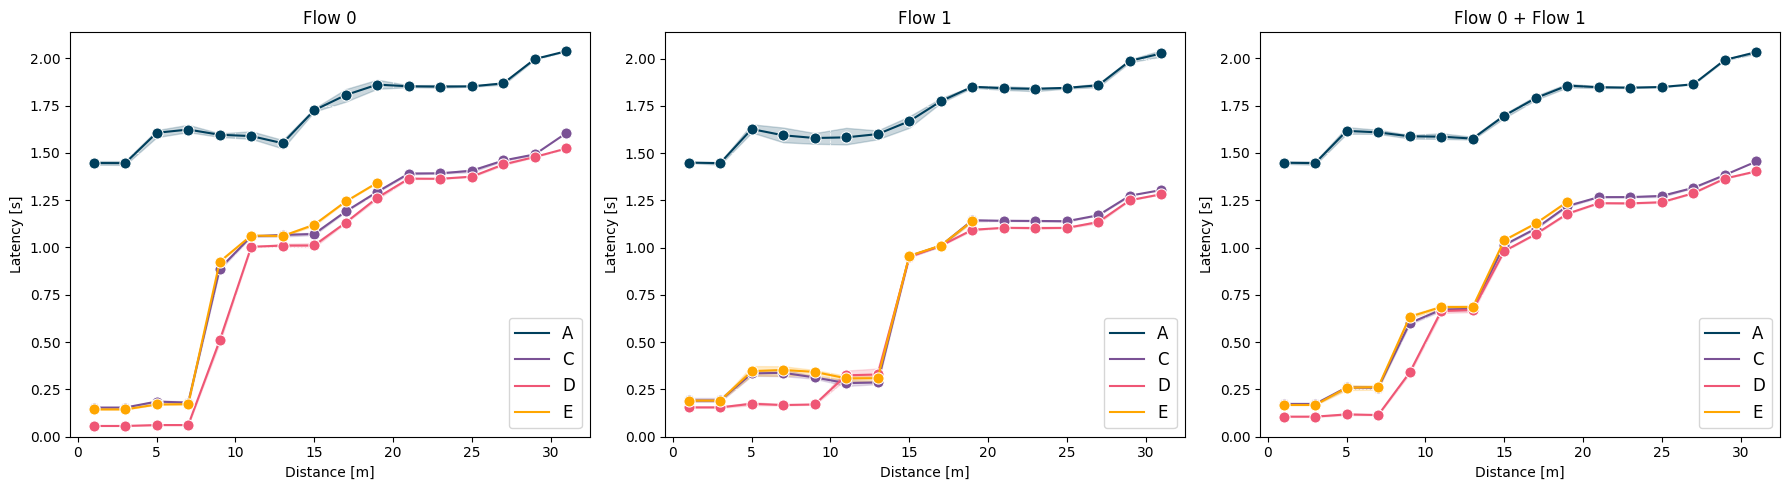

In [28]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Flow 0'),
    (df1, 'Flow 1'),
    (df_sum, 'Flow 0 + Flow 1')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='latency', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[1:7],  # Przytnij, jeśli trzeba
        labels=['A', 'C', 'D', 'E'],  # Twoje etykiety
        ncol=1,
        fontsize='large'
    )

    axes[i].set(xlabel=xlabel, ylabel='Latency [s]')
    axes[i].set_title(title, fontsize='large')
    axes[i].set_ylim(0) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_lat_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1466104044.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1466104044.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1466104044.py:26: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


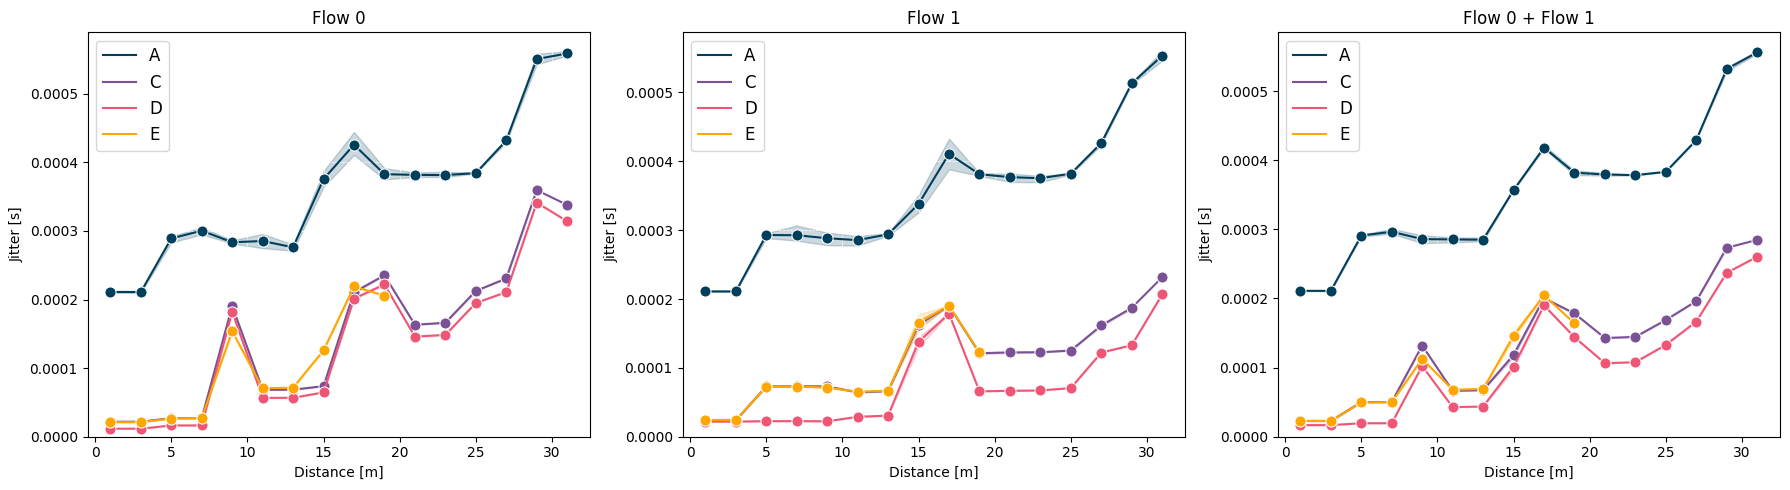

In [29]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Flow 0'),
    (df1, 'Flow 1'),
    (df_sum, 'Flow 0 + Flow 1')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='jitter', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[1:7],  # Przytnij, jeśli trzeba
        labels=['A', 'C', 'D', 'E'],  # Twoje etykiety
        ncol=1,
        fontsize='large'
    )

    axes[i].set(xlabel=xlabel, ylabel='Jitter [s]')
    axes[i].set_title(title, fontsize='large')
    axes[i].set_ylim(0) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_jit_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1403217536.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


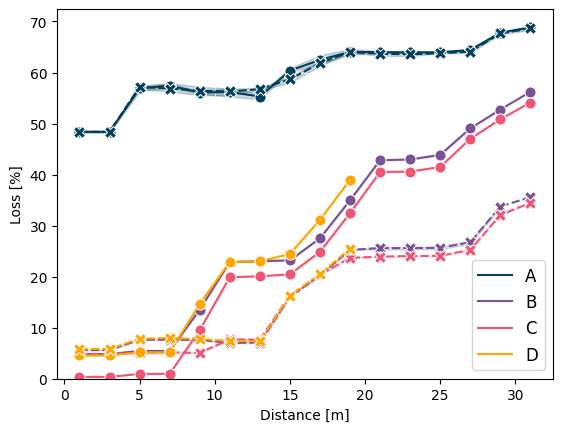

In [30]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Loss [%]')
plt.savefig('dist_loss.svg', bbox_inches='tight')

In [31]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1676141539.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


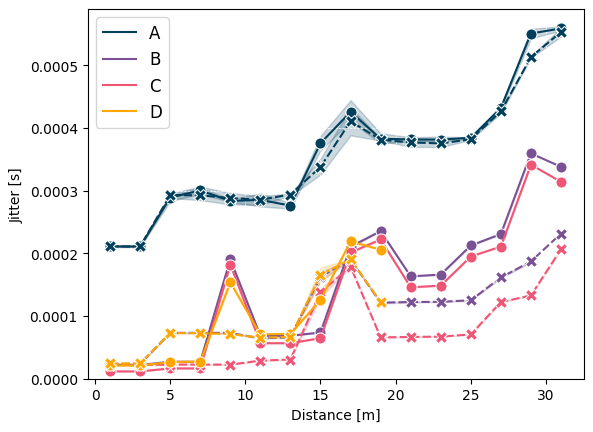

In [32]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
plt.savefig('dist_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\713197596.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


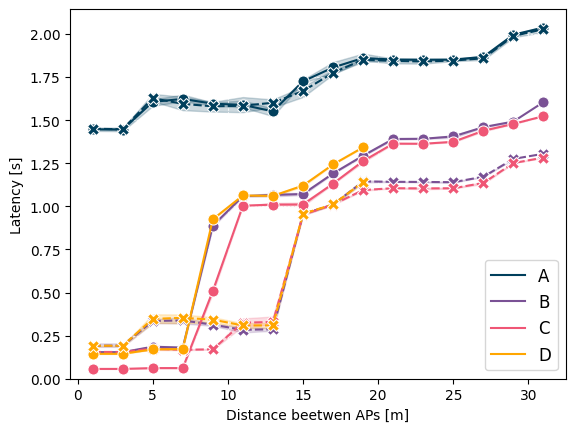

In [33]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Latency [s]')
ax.set_ylim(0)  
plt.savefig('dist_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1614032054.py:12: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[0].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\1614032054.py:30: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[1].legend(


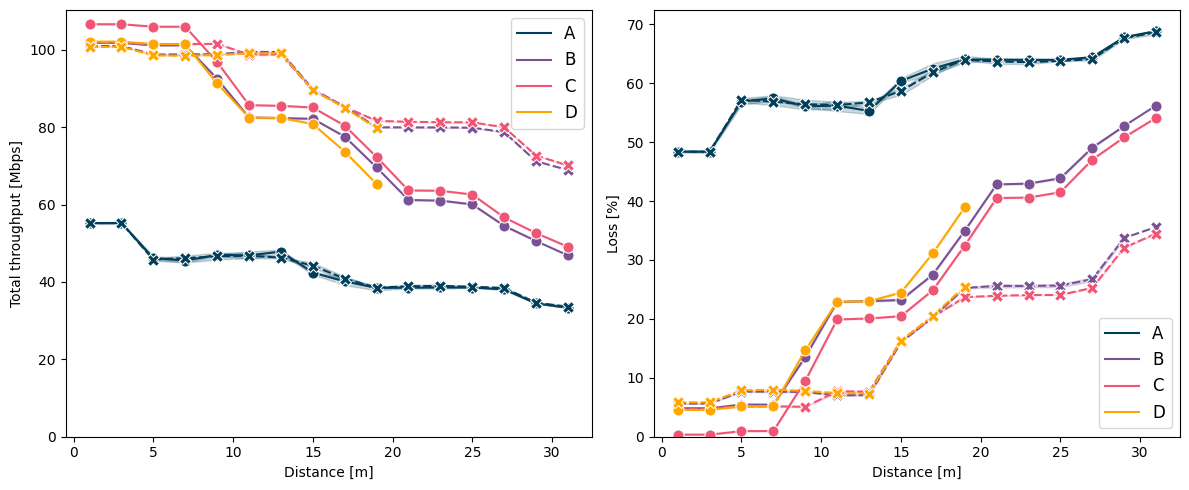

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='flow')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='distance', y='loss', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='flow')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_thr_loss.svg', bbox_inches='tight')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\2306251324.py:12: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[0].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_63188\2306251324.py:31: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[1].legend(


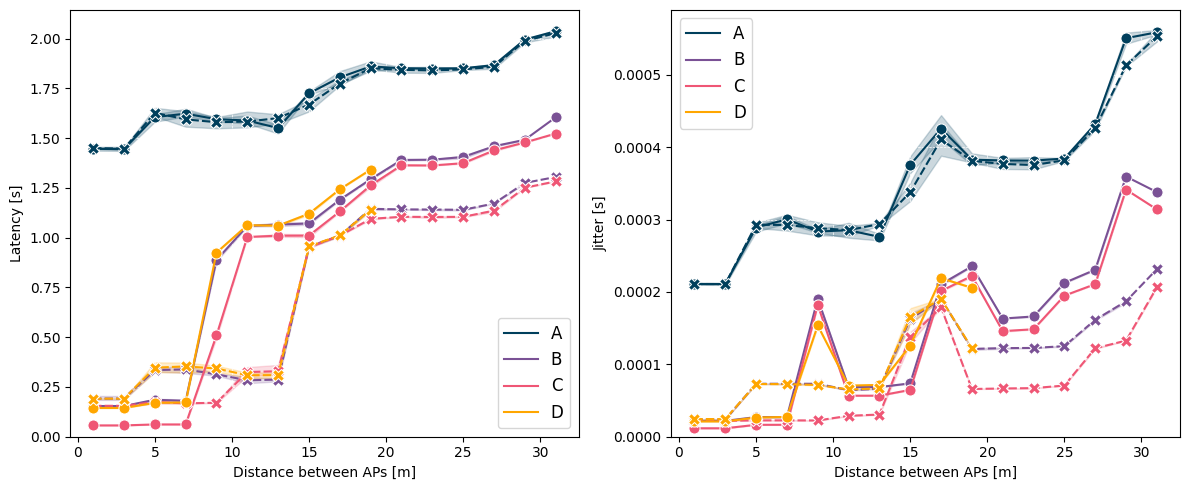

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='distance', y='latency', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='flow')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='flow')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(
      handles=handles[1:7],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_lat_jitter.svg', bbox_inches='tight')
plt.show()
